The idea here is to test the popular TikTok hypothesis that mimic-ing U.S. Senator's trades is a good way to make money. 

1. First, we want to create a total Senator Portfolio

2. We will update this as Senators make trades

3. We then calculate the log-returns of this portfolio and compare these returns to the log returns of various ETFs and calculate whether this portfolio is worth investing in. 


## Creating Senator Index

In [65]:
import yfinance as yf
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import datetime as dt

### Now we get our data

In [6]:
spy = yf.download("SPY")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,pct_change,log_ret
Date,,,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,25.968958,1003200,NaN,NaN
1993-02-01,43.96875,44.25000,43.96875,44.25000,26.153660,480500,0.000000,0.000000
1993-02-02,44.21875,44.37500,44.12500,44.34375,26.209057,201300,0.005686,0.005670
1993-02-03,44.40625,44.84375,44.37500,44.81250,26.486113,529400,0.004240,0.004231
1993-02-04,44.96875,45.09375,44.46875,45.00000,26.596937,531500,0.012667,0.012588


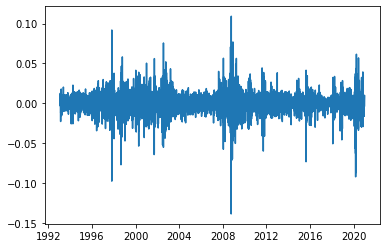

In [67]:
# Calculating log returns
spy['pct_change'] = spy["Open"].pct_change()
spy['log_ret'] = np.log(spy.Open) - np.log(spy.Open.shift(1))
plt.plot(spy["log_ret"])
spy.head()


In [23]:
with open('./all_ticker_transactions.json') as f:
  senate_trades = json.load(f)
sen_trades = pd.DataFrame(senate_trades)
sen_trades = sen_trades.set_index("ticker")
test = sen_trades.loc["BA"]["transactions"]

In [64]:
def find_aggregate_cost(transact_lst):
    '''Finds the current value of a ticker in the senate portfolio if all transations are maximal'''
    total_units = 0
    ticker = 
    try: 
        yf.download(ticker)
    
    for t in transact_lst:
        sign = 1 if t["type"] == "Purchase" else -1 
        print(t)
        total_units += money_range_to_int(t["amount"])*sign
    
    return total_units

def get_ticker(transact):
    

def money_range_to_int(str_range):
    return eval(str_range[str_range[1:].find("$") + 2:].replace(",", ""))

find_aggregate_cost(test, "BA")

{'transaction_date': '12/22/2020', 'owner': 'Spouse', 'ticker': '<a href="https://finance.yahoo.com/q?s=BA" target="_blank">BA</a>', 'asset_description': 'The Boeing Company', 'asset_type': 'Stock', 'type': 'Purchase', 'amount': '$15,001 - $50,000', 'comment': 'R', 'senator': 'Pat Roberts', 'ptr_link': 'https://efdsearch.senate.gov/search/view/ptr/70614aca-cf77-4a70-b0c8-245a097a7350/'}
{'transaction_date': '12/21/2020', 'owner': 'Spouse', 'ticker': '<a href="https://finance.yahoo.com/q?s=BA" target="_blank">BA</a>', 'asset_description': 'The Boeing Company', 'asset_type': 'Stock', 'type': 'Purchase', 'amount': '$15,001 - $50,000', 'comment': 'R', 'senator': 'Pat Roberts', 'ptr_link': 'https://efdsearch.senate.gov/search/view/ptr/70614aca-cf77-4a70-b0c8-245a097a7350/'}
{'transaction_date': '12/07/2020', 'owner': 'Spouse', 'ticker': '<a href="https://finance.yahoo.com/q?s=BA" target="_blank">BA</a>', 'asset_description': 'The Boeing Company', 'asset_type': 'Stock', 'type': 'Purchase', '

0